In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

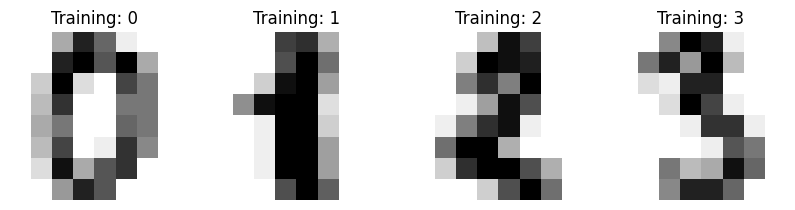

In [2]:
# Load the digits dataset and show the first 4 images as examples
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Normalize pixel values to [0, 1]
data = data / 16.0  

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True, random_state = 12
)

# Learn the digits on the train subset
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

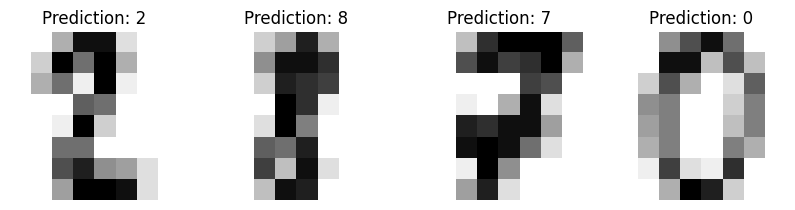

In [4]:
# Illustrate the results of the prediction
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [5]:
# Print the classification report
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression(max_iter=10000):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.88      0.94      0.91        32
           2       0.97      0.97      0.97        38
           3       1.00      0.98      0.99        43
           4       0.97      0.92      0.95        39
           5       0.97      0.94      0.96        34
           6       0.97      0.97      0.97        29
           7       0.98      0.98      0.98        42
           8       0.91      0.91      0.91        32
           9       0.89      0.94      0.91        34

    accuracy                           0.96       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.96      0.96       360




Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  1  0  1  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  1  0]
 [ 0  0  0  0 36  0  0  1  0  2]
 [ 0  0  0  0  0 32  0  0  0  2]
 [ 0  0  0  0  0  1 28  0  0  0]
 [ 0  0  0  0  0  0  0 41  1  0]
 [ 0  2  1  0  0  0  0  0 29  0]
 [ 0  1  0  0  1  0  0  0  0 32]]


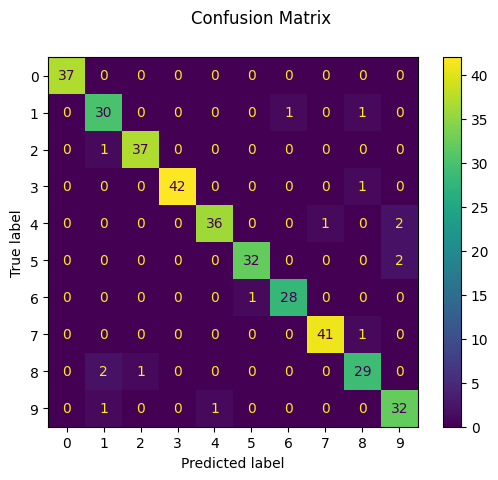

In [6]:
# Print the Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [7]:
print("Accuracy:", accuracy_score(y_test, predicted))


Accuracy: 0.9555555555555556
